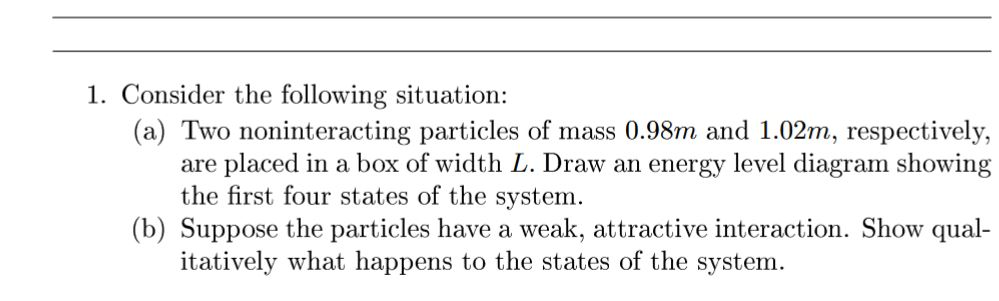

In [1]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
import os
import glob
import shutil
import matplotlib.style as style


style.use('dark_background')
plt.rcParams['text.usetex'] = False



#display screenshots
for i in range(1, 2):
    display(Image(filename=f'p_statement/p{i}.jpg'))

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

In [2]:
#part a, we will do symbolic derivation to confirm hmy hand written sol.
#symbolic vars
n, m, L, hbar, m1, m2 = sp.symbols('n m L hbar m1 m2', real=True, positive=True)
pi = sp.pi

#define single particle energies
E_n = (n**2 * pi**2 * hbar**2) / (2 * m1 * L**2)
E_m = (m**2 * pi**2 * hbar**2) / (2 * m2 * L**2)

#define and calculate total energy
E_total = sp.simplify(E_n + E_m)
display(E_total)
#this is the answer i arrived at as well


pi**2*hbar**2*(m**2*m1 + m2*n**2)/(2*L**2*m1*m2)

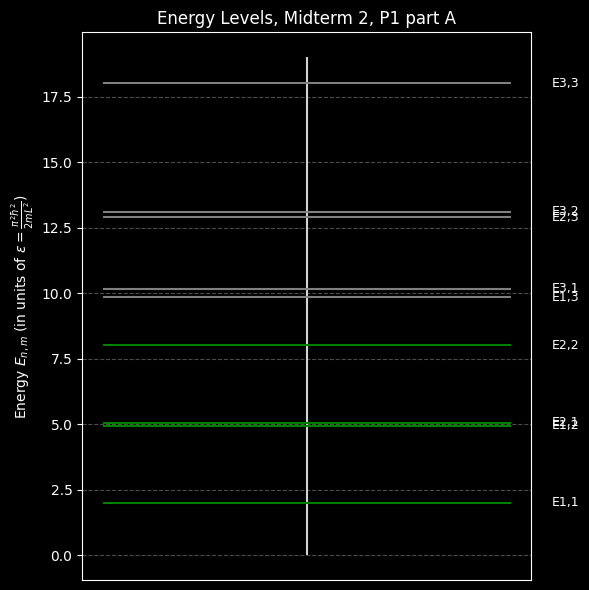

In [3]:
#part a graph:
#moving to numpy for specfic masses
m1_val = 0.98
m2_val = 1.02

#energy unit factor, using epsilon = pi^2 * hbar^2 / (2 * m * L^2) for unit simplicty
def compute_energy(n_val, m_val):
    return (m_val**2 * m1_val + n_val**2 * m2_val) / (m1_val * m2_val)

#generate first couple energy levels (n, m) up to 3 rn but is dynamic
energy_levels = []
for n_val in range(1, 4):
    for m_val in range(1, 4):
        energy = compute_energy(n_val, m_val)
        energy_levels.append(((n_val, m_val), energy))

#sort them
energy_levels_sorted = sorted(energy_levels, key=lambda x: x[1])

#plotting prep
labels = [f'{n},{m}' for (n, m), _ in energy_levels_sorted]
energies = [e for _, e in energy_levels_sorted]

#plt
plt.figure(figsize=(6, 6))
plt.vlines(1, ymin=0, ymax=max(energies) + 1, colors='lightgray')  #epsilon energy axis
for i, (label, energy) in enumerate(zip(labels, energies), start=1):
    plt.hlines(energy, 0.9, 1.1, color='green' if i <= 4 else 'gray')
    plt.text(1.12, energy, f'E{label}', va='center', fontsize=9)

plt.xticks([])
plt.ylabel(r'Energy $E_{n,m}$ (in units of $\epsilon = \frac{\pi^2 \hbar^2}{2mL^2}$)')
plt.title('Energy Levels, Midterm 2, P1 part A')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('Energy Levels of Two Non-Identical Particles in a Box.png',dpi=600)
plt.show()


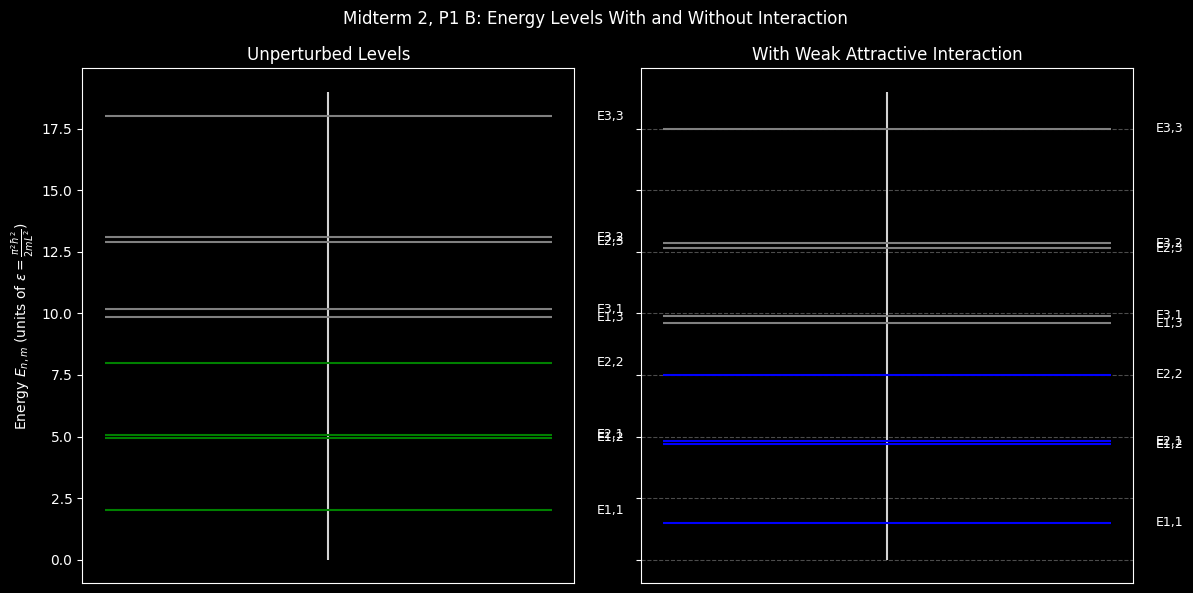

In [4]:
#part b explained qualatativly on paper,but looking graphically:

#num states
n_vals = range(1, 4)
m_vals = range(1, 4)

#show both unperturb and pertubred energy
def compute_energy(n_val, m_val):
    return (m_val**2 * m1_val + n_val**2 * m2_val) / (m1_val * m2_val)

def compute_energy_perturbed(n_val, m_val, V0=1, L=1):
    base = compute_energy(n_val, m_val)
    correction = -V0 / (2 * L) if n_val == m_val else -V0 / (4 * L)
    return base + correction

#start list
energy_levels_unperturbed = []
energy_levels_perturbed = []
#loop and store
for n in n_vals:
    for m in m_vals:
        base_energy = compute_energy(n, m)
        perturbed_energy = compute_energy_perturbed(n, m)
        label = f'{n},{m}'
        energy_levels_unperturbed.append((label, base_energy))
        energy_levels_perturbed.append((label, perturbed_energy))

#sort by e-level
energy_levels_unperturbed = sorted(energy_levels_unperturbed, key=lambda x: x[1])
energy_levels_perturbed = sorted(energy_levels_perturbed, key=lambda x: x[1])

labels_unperturbed = [lbl for lbl, _ in energy_levels_unperturbed]
energies_unperturbed = [e for _, e in energy_levels_unperturbed]

labels_perturbed = [lbl for lbl, _ in energy_levels_perturbed]
energies_perturbed = [e for _, e in energy_levels_perturbed]

#subplot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#og from pr1a
ax1.vlines(1, ymin=0, ymax=max(energies_unperturbed) + 1, colors='lightgray')
for i, (label, energy) in enumerate(zip(labels_unperturbed, energies_unperturbed), start=1):
    ax1.hlines(energy, 0.9, 1.1, color='green' if i <= 4 else 'gray')
    ax1.text(1.12, energy, f'E{label}', va='center', fontsize=9)
ax1.set_xticks([])
ax1.set_ylabel(r'Energy $E_{n,m}$ (units of $\epsilon = \frac{\pi^2 \hbar^2}{2mL^2}$)')
ax1.set_title('Unperturbed Levels')

#slight attrative perturbed
ax2.vlines(1, ymin=0, ymax=max(energies_unperturbed) + 1, colors='lightgray')
for i, (label, energy) in enumerate(zip(labels_perturbed, energies_perturbed), start=1):
    ax2.hlines(energy, 0.9, 1.1, color='blue' if i <= 4 else 'gray')
    ax2.text(1.12, energy, f'E{label}', va='center', fontsize=9)
ax2.set_xticks([])
ax2.set_title('With Weak Attractive Interaction')

plt.suptitle('Midterm 2, P1 B: Energy Levels With and Without Interaction')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('energy levels orginal and perturbed ptb.png',dpi=600)
plt.show()


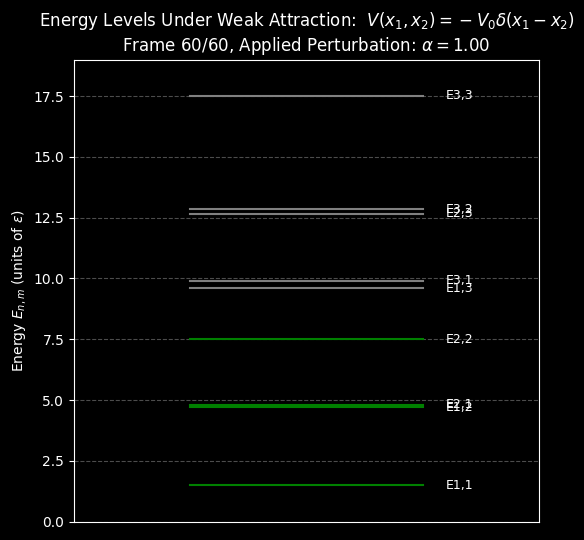

In [5]:
#short ani to see the two
#params
frames = 60
duration_sec = 3
V0 = 1
L = 1

#energy interpolate
def interpolate_energy(n_val, m_val, alpha):
    base = compute_energy(n_val, m_val)
    correction = -V0 / (2 * L) if n_val == m_val else -V0 / (4 * L)
    return base + alpha * correction

#fig ax call
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0.8, 1.2)
ax.set_ylim(0, max(energies_unperturbed) + 1)
ax.set_xticks([])
ax.set_ylabel(r'Energy $E_{n,m}$ (units of $\epsilon$)')
ax.grid(True, axis='y', linestyle='--', alpha=0.3)

#title for updating frame by frame
title_text = ax.set_title('')

#line and label
lines = []
texts = []
for label, _ in energy_levels_unperturbed:
    line = Line2D([0.9, 1.1], [0, 0], color='green')
    ax.add_line(line)
    text = ax.text(1.12, 0, '', va='center', fontsize=9)
    lines.append(line)
    texts.append(text)

#ani frame update
def update(frame):
    alpha = frame / (frames - 1)
    for i, label in enumerate(labels_unperturbed):
        n, m = map(int, label.split(','))
        energy = interpolate_energy(n, m, alpha)
        lines[i].set_ydata([energy, energy])
        texts[i].set_position((1.12, energy))
        texts[i].set_text(f'E{label}')
        lines[i].set_color('green' if i < 4 else 'gray')

    title_text.set_text(
        f'Energy Levels Under Weak Attraction:  $V(x_1, x_2) = -V_0 \\delta(x_1 - x_2)$\n'
        f'Frame {frame+1}/{frames}, '
        f'Applied Perturbation: $\\alpha = {alpha:.2f}$'
    )
    return lines + texts + [title_text]

#call and save ani
ani = animation.FuncAnimation(fig, update, frames=frames, blit=True)
gif_path = 'energy_shift_animation_annotated.gif'
ani.save(gif_path, writer='pillow', fps=frames // duration_sec)


In [6]:
move_plots()

Moved energy levels orginal and perturbed ptb.png to graphs
Moved Energy Levels of Two Non-Identical Particles in a Box.png to graphs
Moved energy_shift_animation_annotated.gif to graphs
